# Module 3: Exploratory Data Analysis: Exercise 0

## Dataset Description

- **Description**: This dataset includes various property metrics crucial for analyzing real estate sales, features, and pricing.
- **Source**:	Real Estate Transaction Records
- **Target Variable**:	SalePrice


Here is a breakdown of the features included in the dataset:


- **BedroomAbvGr basement bedrooms**: Bedrooms above grade 
- **KitchenAbvGr**:	Kitchens above grade
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Fireplaces**: Number of fireplaces
- **GarageYrBlt**: Year garage was built
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **MiscVal**: Value of miscellaneous feature
- **MoSold**: Month Sold (MM)
- **YrSold**: Year Sold (YYYY)
- **SalePrice**: Price of sale (target variable)

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mtlb
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
import requests

#URLs of the files
train_data_url = "https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv"
test_data_url = "https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv"

#Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status() # Ensure we notice bas responses
    with open(file_name, "wb") as file:
        file.write(response.content)
    print(f"Downloaded {file_name} from {url}")

#Downloading the files
download_file(train_data_url, "module3_exercise_train.csv")
download_file(test_data_url, "module3_exercise_test.csv")

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv


In [3]:
df = pd.read_csv("module3_exercise_train.csv", sep=",", index_col="id")

## Data Analysis

In [4]:
df

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,4,1,7.0,0,-1.0,zero,0,0,192,0,0,0,0,0,11,2008.0,130000
1130,3,1,6.0,0,1964.0,two,504,0,0,0,0,0,0,0,7,2008.0,145000
1294,3,1,7.0,1,1996.0,three,889,220,0,0,0,0,0,0,7,2009.0,265000


In [5]:
df.shape

(1168, 17)

**Insight**:

The dataset contains 11168 rows and 17 columns

In [6]:
# Display sample rows of the dataset
print("Sample of the dataset:")
df.sample(10)

Sample of the dataset:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
39,3,1,7.0,0,2000.0,two,663,0,96,0,0,0,0,0,1,2010.0,216000
294,2,1,4.0,0,1953.0,one,240,0,0,0,0,0,0,0,4,2008.0,110000
16,4,1,7.0,0,1969.0,one,299,379,36,0,0,0,0,0,3,2010.0,158000
329,4,1,11.0,1,2006.0,three,1052,125,144,0,0,0,0,0,4,2007.0,424870
130,3,1,7.0,1,1972.0,two,583,0,104,0,0,0,0,0,8,2009.0,158000
475,4,1,10.0,1,2006.0,three,666,324,100,0,0,0,0,0,7,2006.0,361919
94,4,1,8.0,1,1962.0,one,264,0,168,0,0,0,0,0,7,2007.0,169500
849,3,1,7.0,1,2001.0,two,905,0,45,0,0,189,0,0,9,2008.0,287000
201,3,1,8.0,1,2003.0,three,968,248,105,0,0,0,0,0,6,2009.0,386250


**Insight**:

- Some null Columns: ScreenPorch and PoolArea collumns have all their vaues equal to zero. Relatively seeming observation for EnclosedPrch, 3SsnPorch and MiscVal columns which present a large majority of null values. That seems to be coherant because not a lot of houses have porch or pool area. But we must verify further if there is too much or just null values in these columns in order to know of they are useful for the regression task.

- Missing or Erroneous Data: The GarageYrBlt has one negative value. It is a little strange to consider the garage was built before at year 1 before J.C...

- Categorical Variables: the GarageYrBlt and YrSold are categorical variables and will need to be analyzed accordingly.

- String objects: The GarageCars variable should be a numerical variable but the corresponding column seems to have only string object which need to be converted to numerical values

- The GarageYrBlt have float values but are integers in reality. It is not a problem for a regressor so, at first sight, we can let this column unchanged


In [7]:
# Display info dataset
print("\nSummary info:")
df.info()


Summary info:
<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memo

In [8]:
print(df["GarageCars"].unique())

['two' 'one' 'three' 'zero' nan 'four']


In [9]:
# Converts the GarageCars column into numeric values

#def string_to_int(number):
   

In [10]:
df[df.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


Insight:

- The dataset contains three missing values

- The data types are predominantly integers, three of them are float and one of them is object (string) value

In [11]:
print("\nSummary Statistics:")
print(f"Number different values per column:\n{df.nunique()}")
df.describe()


Summary Statistics:
Number different values per column:
BedroomAbvGr       8
KitchenAbvGr       3
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       98
GarageCars         5
GarageArea       387
WoodDeckSF       242
OpenPorchSF      184
EnclosedPorch    105
3SsnPorch         15
ScreenPorch       66
PoolArea           6
MiscVal           19
MoSold            12
YrSold             5
SalePrice        571
dtype: int64


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1167.000000,1168.000000
mean,2.872432,1.043664,6.497858,0.607877,1867.833904,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.802057,179163.845890
std,0.805929,0.212653,1.618330,0.630833,454.504382,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327656,76848.682649
min,0.000000,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


**Insight**:

- 1. **BedroomAbvGr**: The distribution seems to be normal and coherent. The max value is really far from the third quartile, we must verify if it is an isolated outlier, or (and it seems to be coherent), juste 25% of the population own really big houses. At first sight, since the mean is really near to 3 (2.8) and the std lower than 1, we can think to the max value as an outlier

- 2. **KitchenAbvGr**: The mean is very near to the third quartile with just 0.04 point of difference between twice. The max value of 3 kitchen cn be thought as an outlier value (and that seems to be a coherent fact since ther is no specil need for one family to own more then two kitchens...)

- 3. **TotRmsAbvGrd**: The number of rooms in each house seems to be more "normally" (in the mathematical and common sense) distributed than the other since we have not got 75% of the values lower than one value. The mean of 6.49 let think to a more large gamme of values between the third quartile (7) and the max value (14), since only 25% of the values are upper than 6 (there are not half rooms...) and 50 % of the values are lower than 5. The standard deviation of only ~1.6 let think there are not a lot of values really far from 5. All those suppositions need to be verified by further and deeper statistical analysis.

- 4. **Fireplaces**: Half of the houses have not got any fireplace. Mean and std of ~0,6 let think to the max value as an outlier

- 5. **GarageYrBlt**: The min value which is negative one seems to be erroneous. It could be the cause of the std upper than 450, with 75% of the value between 1957 and 2010... Categorical variable, must be analysed accordingly to its nature.

- 6. **GarageArea**: The std of ~211 seems to be small compared to the difference between the min/max value and the mean value, which can let think about these two values as outliers

- 7. **WoodDeckSF**: No less than 50 % of the sample do not own any Wood Deck. That seems to be coherent with the reality. However the Max valule seems to be very far from the mean value and also the others, since the std is only of ~123.

- 8. **OpenPorchSF**: Same remark than the precedent variable. With the different that only 25% of the sample have not any porch.

- 9. **EnclosedPorch**: Same remark wih the difference that 75% of the sample have no enclosed porch. Also, we must verify if the max value (very large) is an isolated outlier, in which case we should think about nor considering this value for the regression task, or if there are other positive values, in which case this variable could be useful.

- 10. **3SsnPorch**: Same remark than "EnclosedPorch" remark. The mean is very low, which reinforce the hypothesis of the max value as an outlier

- 11. **ScreenPorch**: Same remark than "3SsnPorch" remark

- 12. **PoolArea**: Same remark than "3SsnPorch" remark

- 13. **MiscVal**: Same remark than "3SsnPorch" remark

- 14. **MoSold**: Categorical variable, must be analysed accordingly to its nature.

- 15. **YrSolde**: Categorical variable, must be analysed accordingly to its nature.






In [12]:
# Check for duplicate rows
print("\nDuplicate rows:")
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())


Duplicate rows:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1057,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000
1389,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000


**Insight**:

- There is only one duplicated row (two rows which are the same ones)

#### Distribution of Numerical Features


Histograms of numerical features:


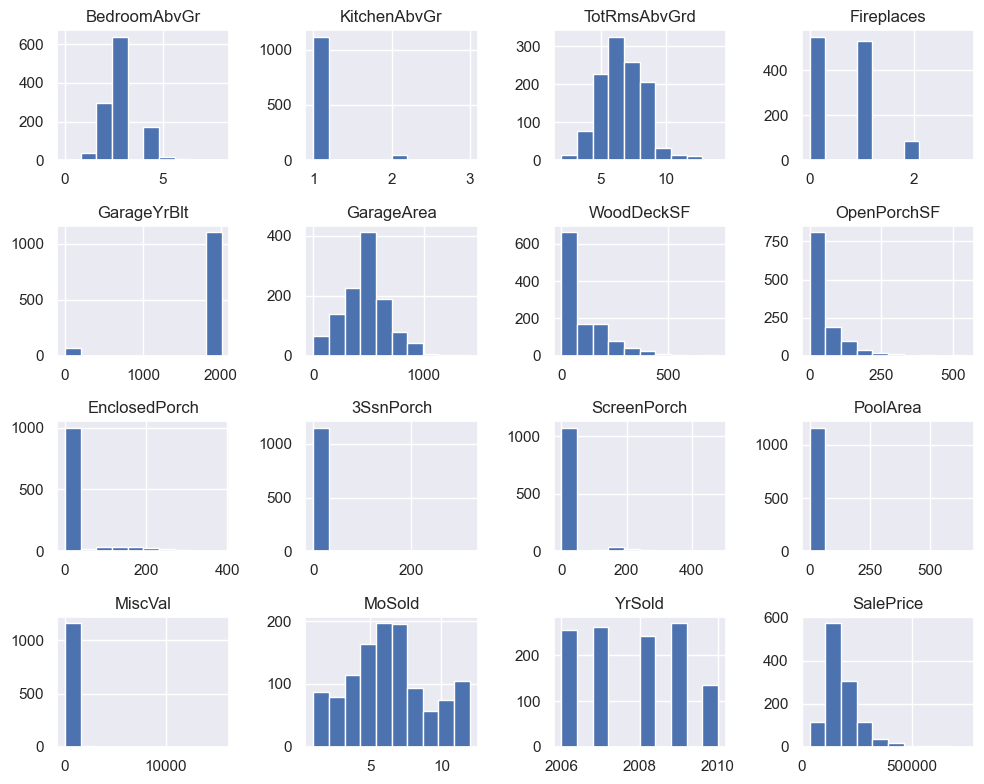

In [13]:
print("\nHistograms of numerical features:")
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

**Insight**:

1. **BedroomAbvGr**: 
- The graph reinforces the first intuition about the max value which seems to be an outlier
- There are non negligeable houses awith more than 3 bedrooms (the thirde quartile).

2. **KitchenAbvGr**:
- A very large majority seems to own only one kitchen. Which raises the question of this variable for the regression.
- The graph reinforces the first intuition about the max value which seems to be an outlier

3. **TorRmsAbvGrd**:
- As intuited before, this variable seems to be normally distributed

4. **FirePlaces**:
- There is a non-negligeable number of houses with two fire places
- As intuited before, the hypothesis of the max value as an outlier seems is reinforced.

5. **GarageYrBlt**:
- It seems, non negligeable proportion of houes were built very late in past, we must treat these values correctly.
- The negative value seems to be an outlier
- No more to add on the previous section.

6. **GarageArea**:
- This variable seems to be normally ditributed

7. **WoodDeckSF**:
- The distribution is right skewed with a large majority of houses having no Wood Deck

8. **OpenPorchSF**:
- The distribution is right skewed with a larger majority of houses having no OpenPorch than houses having no Wood Deck

9. **EnclosedPorch**:
- A very large proportion of the houses (~85%) have no Enclosed Porch. 
-The surface of the enclosed Porch of those having one is rougly equally distributed in the "houses having one"'s sample

10. **3SsnPorch**:
- A very (very) large proportion of the houses have no Three season porch. Those having can easily be thought as outliers

11. **ScreenPorch**:
- Same remark than EnclosedPorch's remark, qith a much lalrger proportion of houses having no Sreen Porch. Also, those having got one seems to have got less than 200 SF surface.

12. **PoolArea**:
- Same remark than for "3SsnPorch" variable

13. **MiscVal**:
- Same remark than for "3SsnPorch" variable

14. **MoSold**:
- The distrbution seems to be roughly equitable

15. **YrSold**:
- The distrbution seems to be roughly equitable

16. **SalePrice**:
- The distribution is right skewed with a peakon the second quart of the x-axis.
- The distribution seems not to be normal one but more a Student or Khi-2 one.




#### Outlier Detection


Box plots to check for outliers:


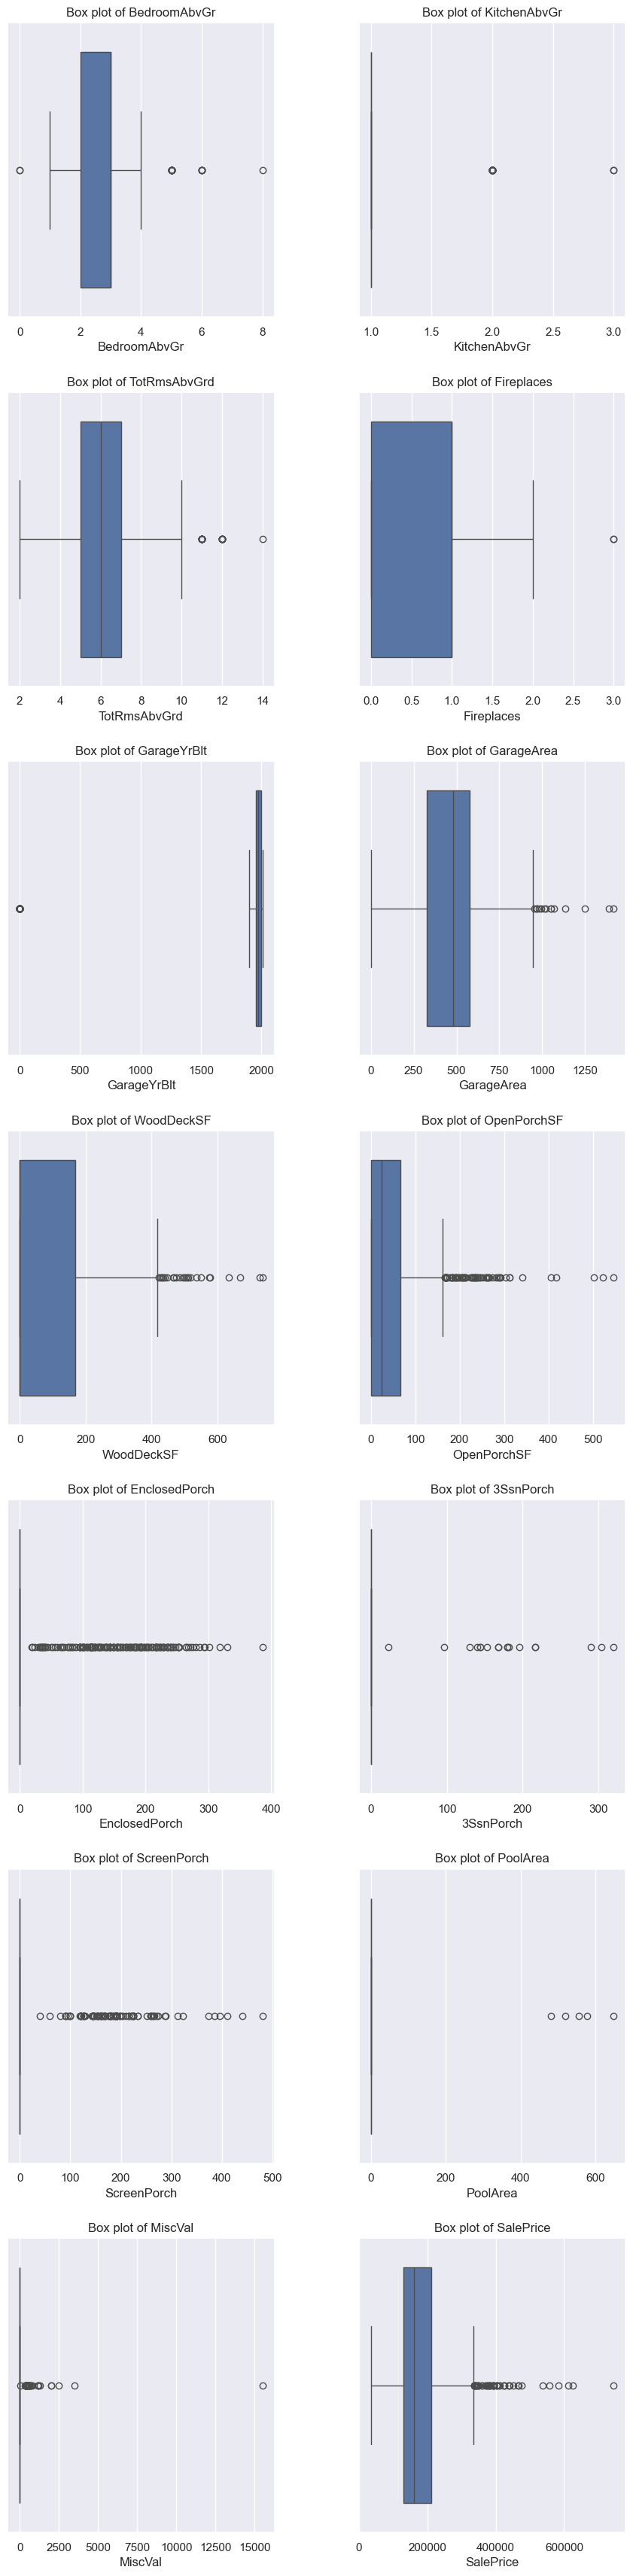

In [14]:
# Box plots for numerical values to check outliers
print("\nBox plots to check for outliers:")
df_numeric = df.drop(columns=["GarageCars", "MoSold", "YrSold"])
numeric_cols = df_numeric.columns

#Set up the plot grid
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows*5))
fig.tight_layout(pad=4.0)

for index, col in enumerate(numeric_cols):
    row = index // n_cols
    col_pos = index % n_cols
    sns.boxplot(x=df_numeric[col], ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f"Box plot of {col}")

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()

**Insight**:

- The boxplots confirm all the hypothesis enonced in the previous sections

#### Correlation Analysis

In [15]:
# GarageCars is a string colums, as we don't know how to convert it for the moment, we will remove it
df.drop("GarageCars", axis=1, inplace=True)


Correlation matrix:


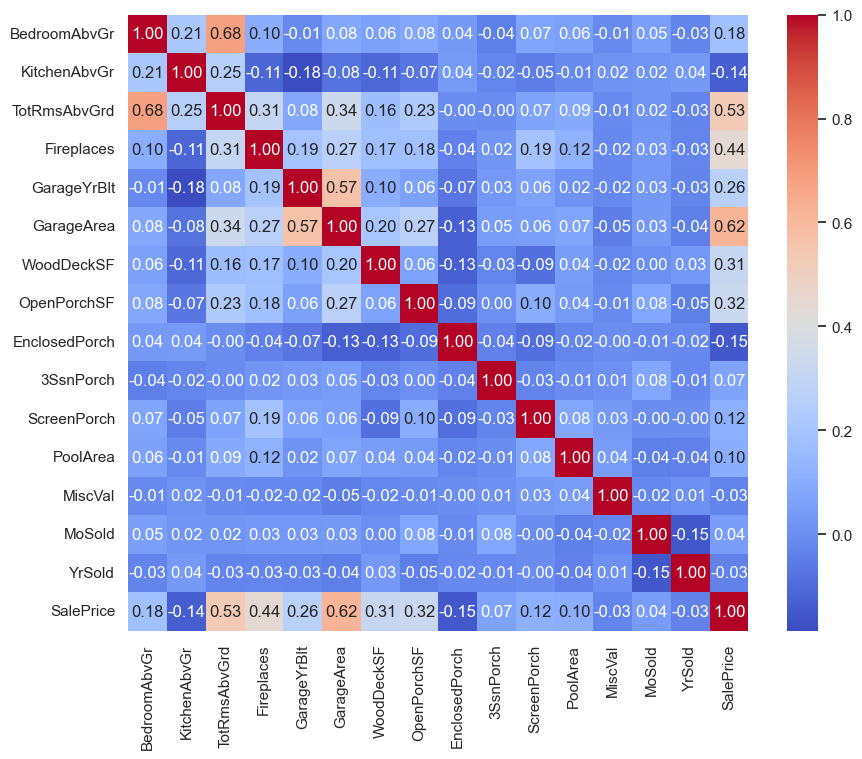

In [16]:
# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


 Important correlations with 'SalePrice':


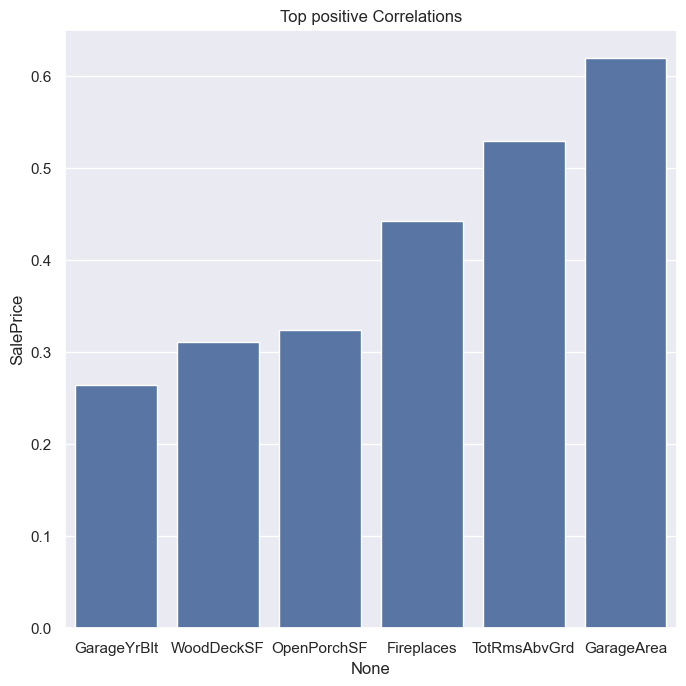

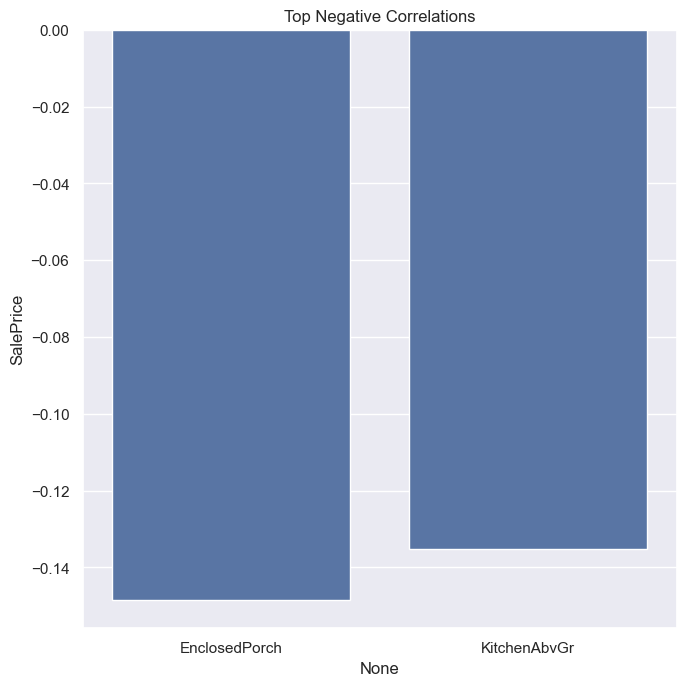

In [17]:
#### Important Correlaions with "Sruvived"
print("\n Important correlations with 'SalePrice':")
corrs = df.corr().sort_values(by=["SalePrice"])["SalePrice"].iloc[:-1]
corrs_max = corrs[-6:]
corrs_min = corrs[:2] # There are only 2 really interesting negative correlations

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=corrs_max.index, y=corrs_max)
plt.title("Top positive Correlations")
fig.tight_layout(pad=4.0)

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=corrs_min.index, y=corrs_min)
plt.title("Top Negative Correlations")
fig.tight_layout(pad=4.0)


Pairplot of Selected features:


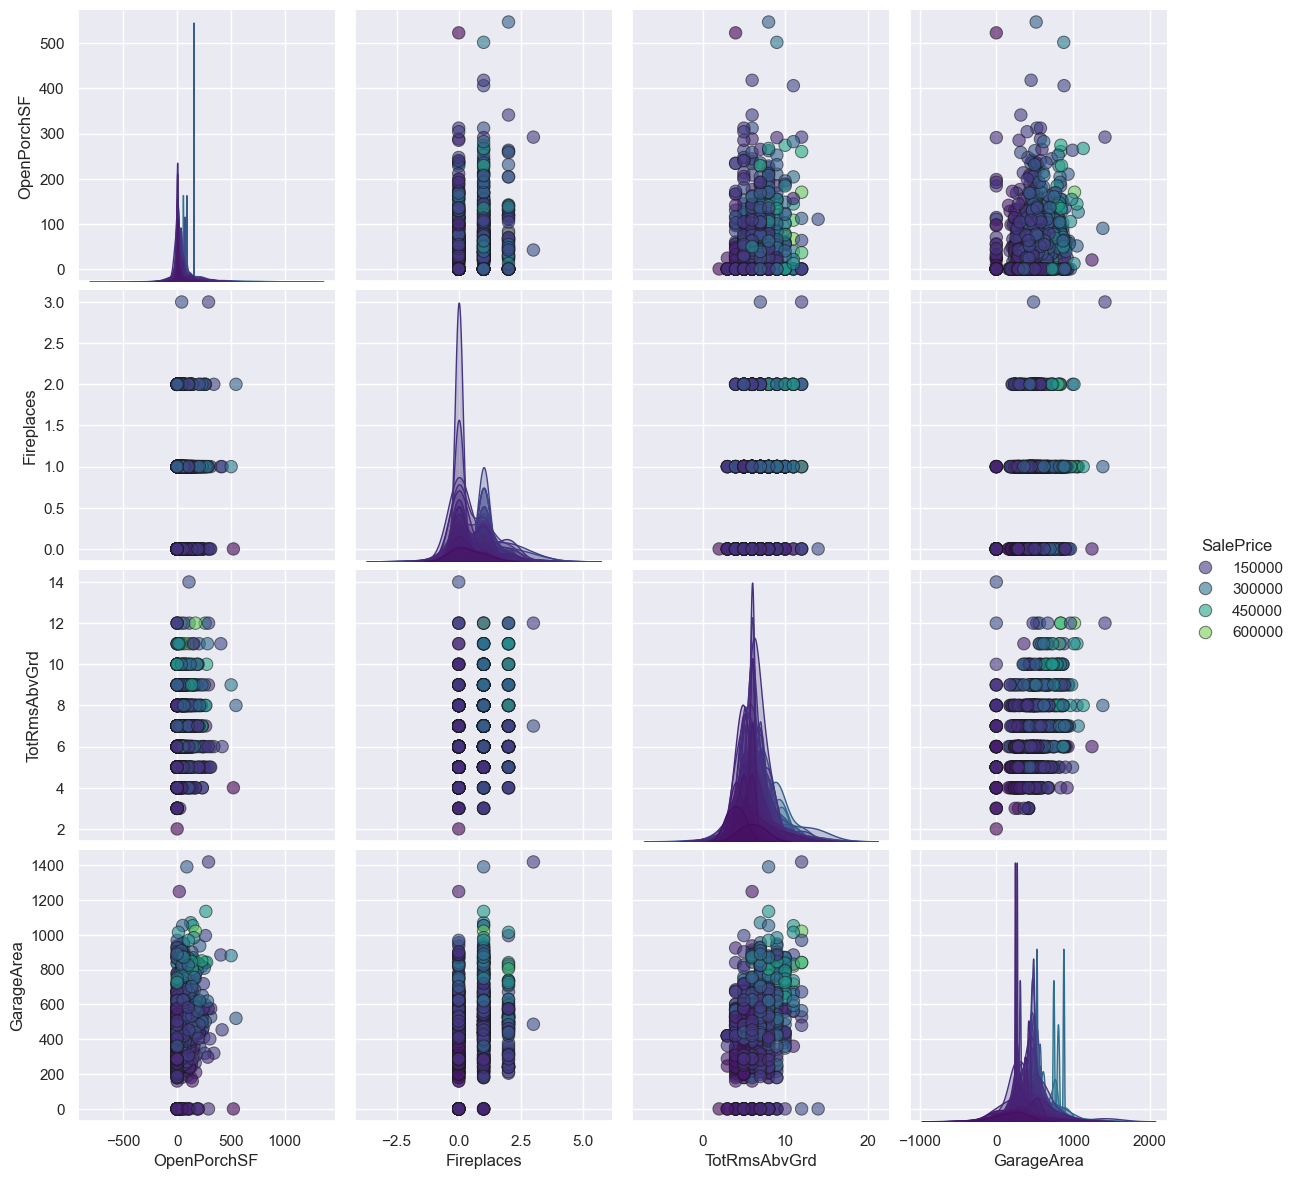

In [18]:
# Pairplot for pairwise relationships in the dataset
print("\nPairplot of Selected features:")
selected_features = ["OpenPorchSF", "Fireplaces", "TotRmsAbvGrd", "GarageArea", "SalePrice"]

# Creating pairplot
sns.pairplot(df[selected_features], hue='SalePrice', palette='viridis', diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=3)
plt.show()

#### Compare distribution of train and test data

In [19]:
# Read test and apply same changes as train
X_test = pd.read_csv("module3_exercise_test.csv", sep=",", index_col="id")
X_test.drop("GarageCars", axis=1, inplace=True)

In [20]:
X_test.shape

(292, 15)

In [21]:
X_test.isnull().sum()

BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       1
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    1
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

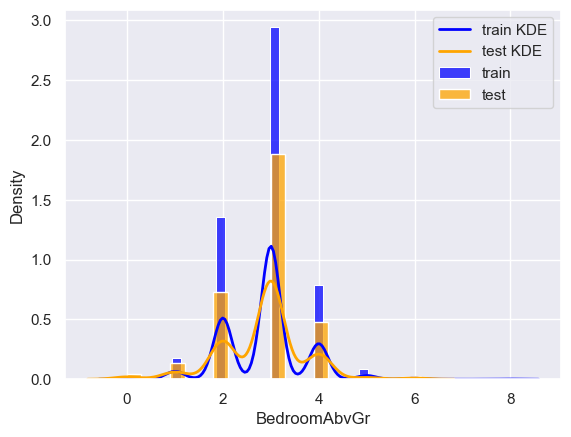

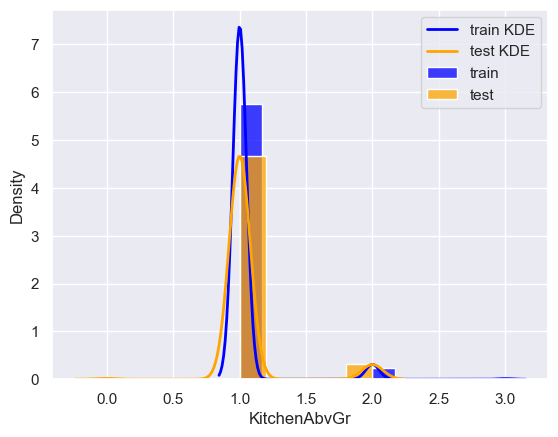

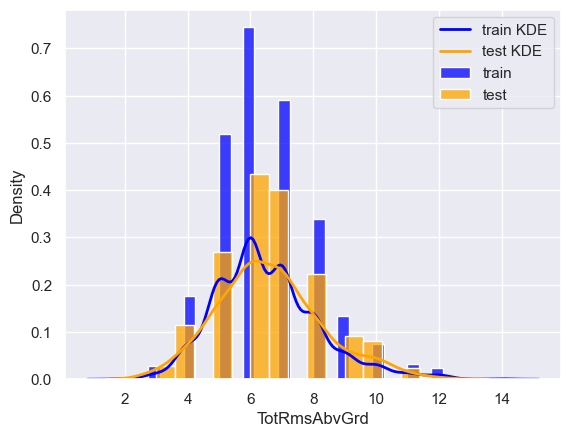

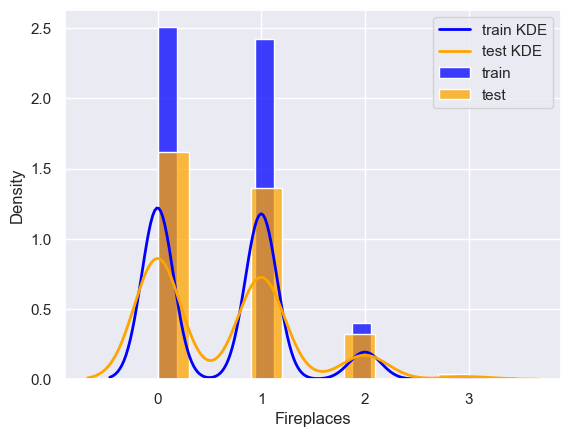

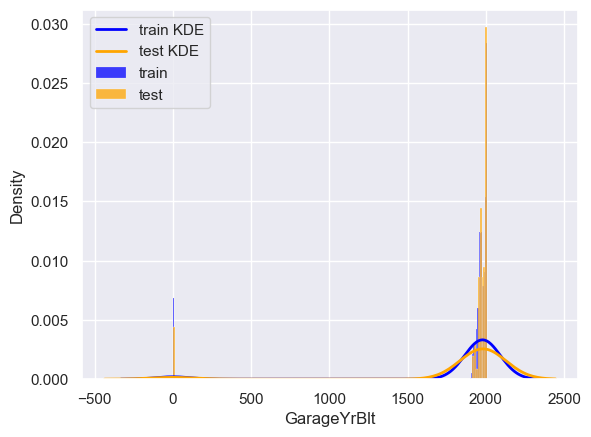

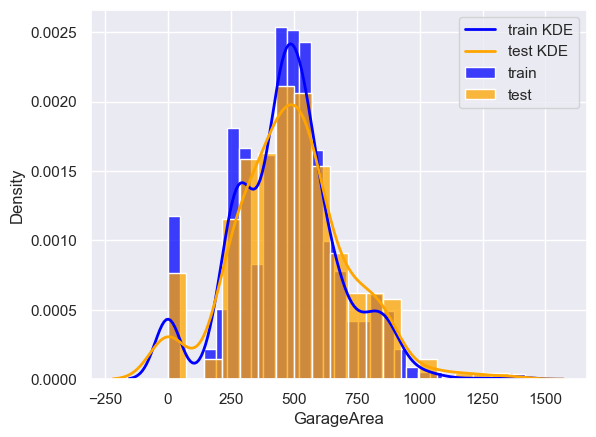

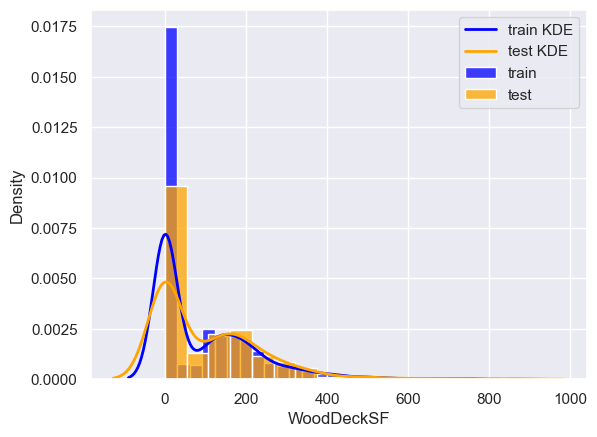

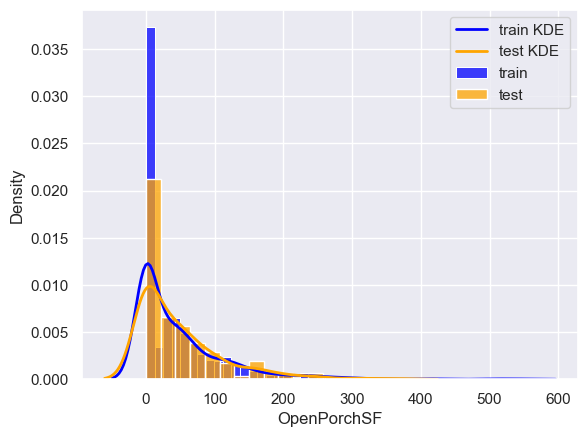

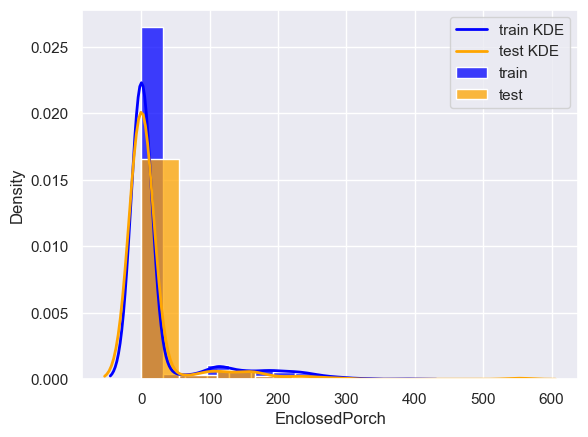

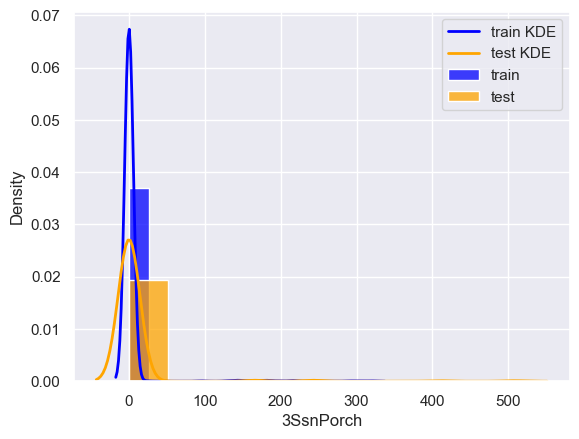

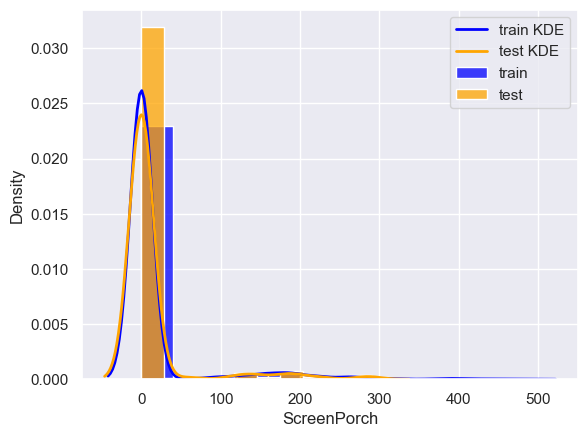

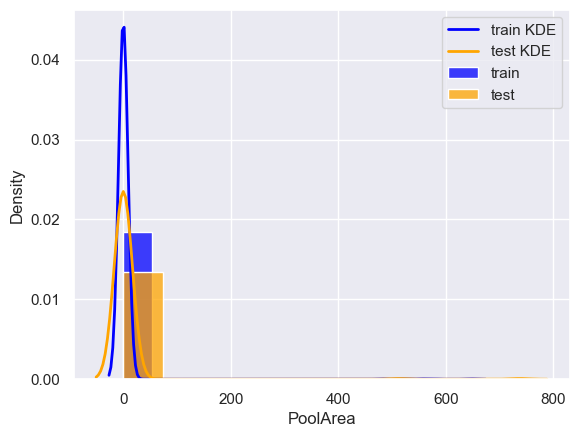

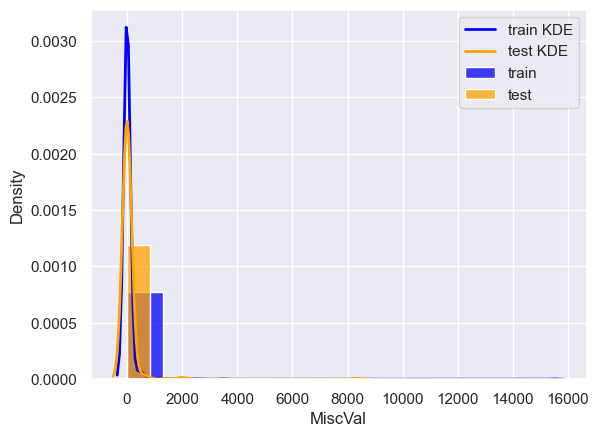

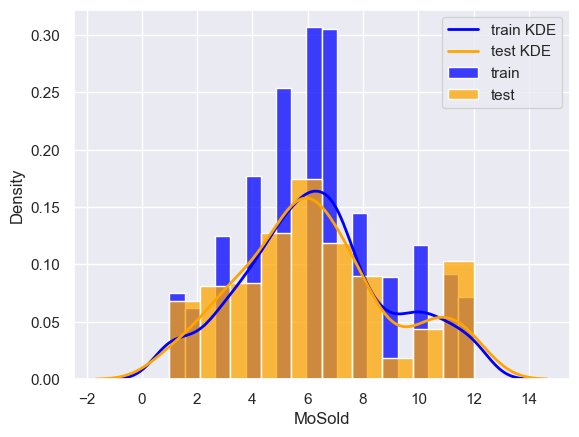

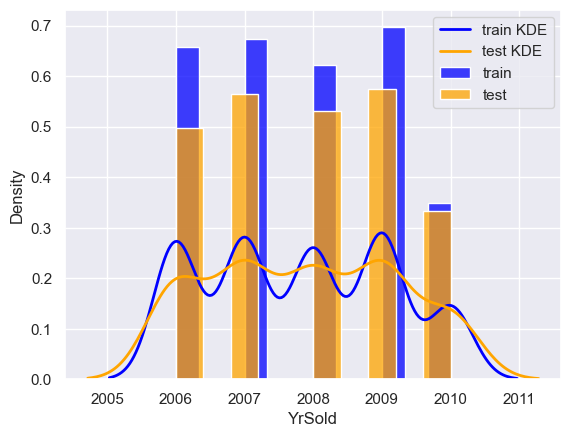

In [22]:
for col in X_test.columns:
    plt.figure()
    
    # Plot histograms for train and test
    sns.histplot(df[col], label='train', color='blue', kde=False, stat='density')
    sns.histplot(X_test[col], label='test', color='orange', kde=False, stat='density')
    
    # Overlay KDE plots for train and test
    sns.kdeplot(df[col], color='blue', label='train KDE', linewidth=2)
    sns.kdeplot(X_test[col], color='orange', label='test KDE', linewidth=2)
    
    plt.legend()
    plt.show()

**Insight:**

The 1d density is similar from train to test